### Machine Learning
#### Sheila Leyva López
##### Ejercicio de clase
###### 22/11/2022

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import pandas as pd
import sys
from tqdm import tqdm
import seaborn as sns
import random
from statistics import mode
#from scipy.stats import mode

In [504]:
df = pd.read_csv('./dow_jones_index.data',',')

C:\Users\sleyv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [505]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


#### Función para calcular el número de atributos y los atributos contenidos en el dataframe

In [506]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
    for i in range(num_atributos_):   
        print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

#### Función para obtener los atributos, sus observaciones y el tipo de atributo

In [507]:
def Observaciones(df_o, atributos_o):
    observaciones_ = {}
    for i, atributo in enumerate(atributos_o):
        obs_ = df_o[atributo].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        obs_ = pd.DataFrame(obs_.index)      

        tipo = df_o[atributo].dtypes

        if tipo == 'object': tipo = 'categórico'
        elif tipo == 'int': tipo = 'entero'
        elif tipo == 'float64': tipo = 'flotante'

        print(f'''El atributo {atributo} es de tipo {tipo}, contiene {len(obs_l_)} observaciones y son las siguientes:
        {obs_l_}
              ''')
        observaciones_.update({atributo:obs_})    
    return observaciones_

#### Función para calcular el número de instancias

In [508]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
    print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

#### Función para conocer el número de datos faltantes

In [509]:
def Datos_Faltantes(df_):
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n {faltantes_df}')
    #return faltantes_df

In [510]:
def Distribucion(df_, atributo_, atributo_d):
  fig, ax = plt.subplots(figsize = (10,8))
  sns.histplot(data = df_, x = atributo_,ax = ax, kde=True, element = 'step')
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  ax.set_xlabel(atributo_)
  ax.set_ylabel("Frequencia")
  plt.show()

In [511]:
num_atributos, atributos = Numero_atributos(df)

El dataset tiene 16 atributos:
1.- quarter 
2.- stock 
3.- date 
4.- open 
5.- high 
6.- low 
7.- close 
8.- volume 
9.- percent_change_price 
10.- percent_change_volume_over_last_wk 
11.- previous_weeks_volume 
12.- next_weeks_open 
13.- next_weeks_close 
14.- percent_change_next_weeks_price 
15.- days_to_next_dividend 
16.- percent_return_next_dividend 


In [512]:
num_instancias = Numero_instancias(df)

El dataset tiene 750 instancias


In [513]:
#observaciones = Observaciones(df, atributos)

In [514]:
Datos_Faltantes(df)

Datos faltantes por atributo:
 quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64


In [515]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

### Removiendo signo de pesos y convirtiendo en float

In [516]:
def remove_sign(data, atributo):
    for idx, num in enumerate(data[atributo]):
        #print(i)
        new_num = float(str(num).replace('$',''))
        #print(new_num)
        df.at[idx,atributo] = new_num

In [517]:
remove_sign(df,'open')

In [518]:
remove_sign(df,'high')

In [519]:
remove_sign(df,'low')

In [520]:
remove_sign(df,'close')

In [521]:
remove_sign(df,'next_weeks_close')

In [522]:
remove_sign(df,'next_weeks_open')

In [523]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.6,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.0,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.0,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [524]:
type(df['open'][0])

float

### Análisis de datos faltantes para el atributo percent_change_volume_over_last_wk

In [525]:
df['percent_change_volume_over_last_wk']

0            NaN
1       1.380223
2     -43.024959
3       9.355500
4       1.987452
         ...    
745   -21.355713
746    15.221032
747    17.508519
748     8.811952
749    18.064204
Name: percent_change_volume_over_last_wk, Length: 750, dtype: float64

#### Graficando la distribución del atributo con datos faltantes

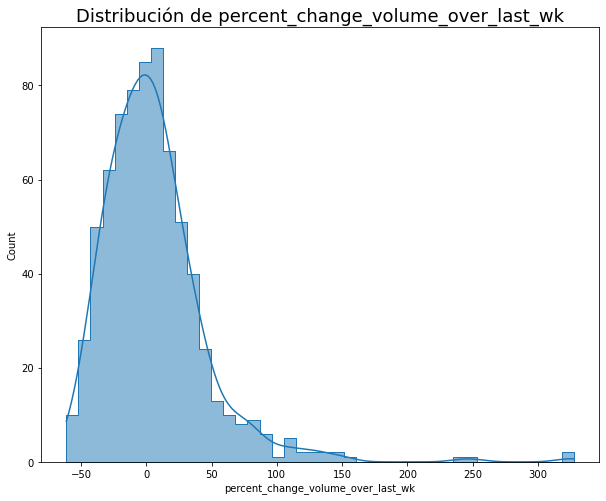

In [526]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df, x = 'percent_change_volume_over_last_wk',ax = ax, kde=True, element = 'step')
plt.title('Distribución de percent_change_volume_over_last_wk', fontsize = 18)
plt.show()

#### Normalizando los datos del atributo

In [527]:
#lim_sup y lim_inf son los nuevos límites
def norm_min_max(df_atributo, lim_inf, lim_sup):
    df_atri_min = df_atributo.min()
    df_atri_max = df_atributo.max()
    rango = lim_sup - lim_inf
    df_norm_min_max = (((df_atributo - df_atri_min)/(df_atri_max - df_atri_min)) * rango) + lim_inf
    return df_norm_min_max

In [528]:
df_norm_pcvolw = norm_min_max(df['percent_change_volume_over_last_wk'],-1,1)

In [529]:
df['percent_change_volume_over_last_wk']=df_norm_pcvolw

In [530]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,-0.676921,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.6,15.79,138428495,-2.47066,-0.905318,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,-0.635900,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,-0.673798,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-0.793863,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,-0.605731,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,-0.593965,78616295.0,80.0,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.0,80.82,78.33,79.02,100521400,-1.22500,-0.638696,92380844.0,78.65,76.78,-2.377620,54,0.594786


#### Graficando la distribución del atributo después de la normalización

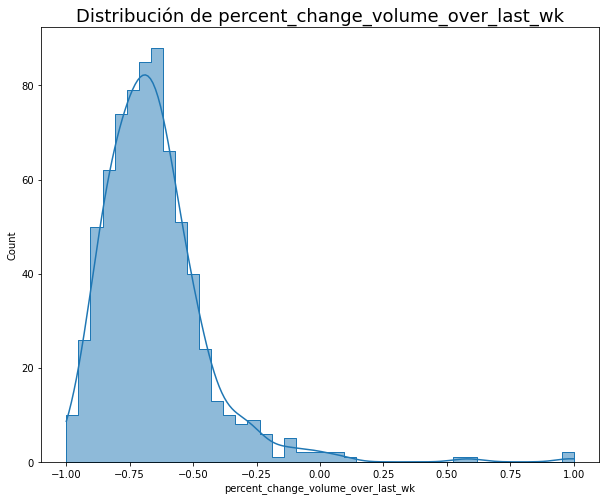

In [531]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df, x = 'percent_change_volume_over_last_wk',ax = ax, kde=True, element = 'step')
plt.title('Distribución de percent_change_volume_over_last_wk', fontsize = 18)
plt.show()

#### Imputando datos faltantes

In [532]:
def imputacion_aleatoria(df_aleat, atributo_):
    df_a = df_aleat.copy()
    faltantes_df = df_a[atributo_].isnull().sum()
    no_faltantes = df_a[df_a[atributo_].notnull()]

    min = no_faltantes[atributo_].min()
    max = no_faltantes[atributo_].max()
    
    tipo = df_a[atributo_].dtypes
    print(tipo)
    if tipo == 'O': 
      random_string_list = []
      for i, atributo in enumerate(atributo_):
        obs_ = df_a[atributo_].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
      for i in range(faltantes_df):
        x = random.choices(obs_l_)
        random_string_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_string_list
   
    elif tipo == 'int64': 
      
      random_int_list = []
      for i in range(faltantes_df):
        x = random.radint(min,max)
        random_int_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_int_list

    elif tipo == 'float64': 
    
      random_float_list = []
      for i in range(faltantes_df):
        x = round(random.uniform(min,max),2)
        random_float_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_float_list

    return df_a

In [533]:
df_imp_pcvolw = imputacion_aleatoria(df, 'percent_change_volume_over_last_wk')

float64


In [534]:
df_imp_pcvolw

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,0.170000,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,-0.676921,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.6,15.79,138428495,-2.47066,-0.905318,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,-0.635900,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,-0.673798,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-0.793863,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,-0.605731,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,-0.593965,78616295.0,80.0,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.0,80.82,78.33,79.02,100521400,-1.22500,-0.638696,92380844.0,78.65,76.78,-2.377620,54,0.594786


#### Graficando la distribución del atributo después de la imputación

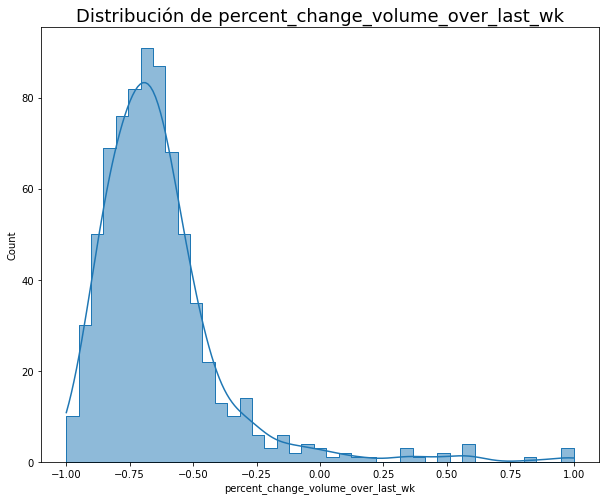

In [535]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df_imp_pcvolw, x = 'percent_change_volume_over_last_wk',ax = ax, kde=True, element = 'step')
plt.title('Distribución de percent_change_volume_over_last_wk', fontsize = 18)
plt.show()

In [536]:
Datos_Faltantes(df_imp_pcvolw)

Datos faltantes por atributo:
 quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk     0
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64


In [537]:
df = df_imp_pcvolw

#### Graficando la distribución del atributo con datos faltantes

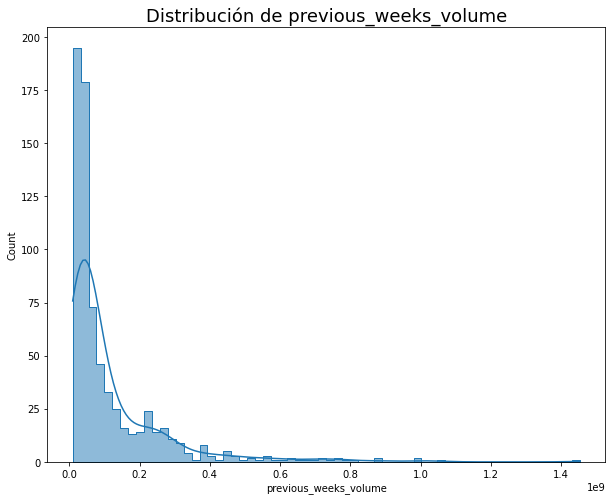

In [538]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df, x = 'previous_weeks_volume',ax = ax, kde=True, element = 'step')
plt.title('Distribución de previous_weeks_volume', fontsize = 18)
plt.show()

In [539]:
df_imp_pwv = imputacion_aleatoria(df, 'previous_weeks_volume')

float64


In [540]:
df_imp_pwv

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,0.170000,6.238539e+08,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,-0.676921,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.6,15.79,138428495,-2.47066,-0.905318,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,-0.635900,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,-0.673798,1.513792e+08,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-0.793863,8.675882e+07,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,-0.605731,6.823086e+07,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,-0.593965,7.861630e+07,80.0,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.0,80.82,78.33,79.02,100521400,-1.22500,-0.638696,9.238084e+07,78.65,76.78,-2.377620,54,0.594786


Corroboraron que no existan datos faltantes en los atributos

In [541]:
Datos_Faltantes(df_imp_pwv)

Datos faltantes por atributo:
 quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64


In [542]:
df = df_imp_pwv

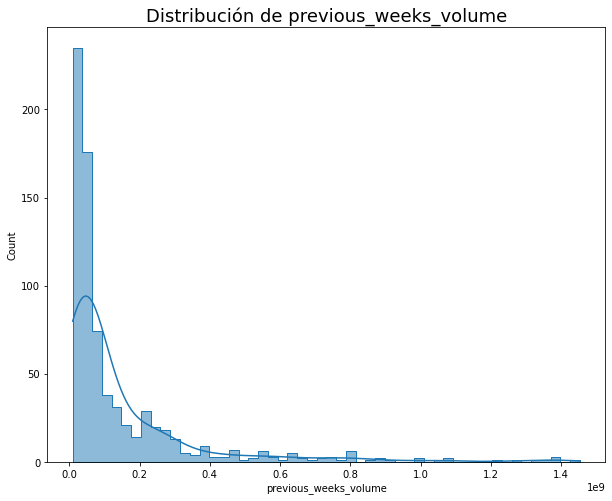

In [543]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df, x = 'previous_weeks_volume',ax = ax, kde=True, element = 'step')
plt.title('Distribución de previous_weeks_volume', fontsize = 18)
plt.show()

### Análisis de Componentes Principales

In [558]:
df_y = df_cod

In [559]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

Eliminando el atributo del tiempo

In [560]:
df_y = df_y.drop(['date'],axis=1)

Ajustar los datos restando la media a cada atributo

In [562]:
datos_A = pd.DataFrame(columns=df_y.columns,index=range(len(df)))
for i in datos_A.columns:
    datos_A[i] = df_y[i] - df_y[i].mean()    
datos_A

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,-0.52,-14.5,-37.83184,-37.949987,-36.86016,-37.309267,1.221078e+08,3.742408,-0.333041,3.055987e+08,-36.99244,-37.91908,-4.666958,-26.525333,-0.509122
1,-0.52,-14.5,-36.94184,-37.959987,-37.00016,-37.759267,1.254156e+08,-4.478752,-0.049962,9.561970e+07,-37.51244,-38.09908,-2.709128,-33.525333,-0.503974
2,-0.52,-14.5,-37.46184,-38.289987,-37.04016,-37.939267,2.088069e+07,-2.520922,-0.278358,9.892748e+07,-37.83244,-37.75908,1.399842,-40.525333,-0.501832
3,-0.52,-14.5,-37.78184,-38.039987,-36.82016,-37.599267,3.383137e+07,1.588048,-0.008941,-5.607418e+06,-37.52244,-36.74908,5.694782,-47.525333,-0.505837
4,-0.52,-14.5,-37.47184,-37.279987,-36.46016,-36.589267,3.683996e+07,5.882988,-0.046838,7.343260e+06,-36.37244,-36.51908,-0.007654,44.474667,-0.516797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.48,14.5,26.56816,27.960013,27.42984,28.900733,-4.931695e+07,2.953978,-0.166903,-5.727709e+07,29.57756,27.29092,-2.760078,22.474667,-0.123025
746,0.48,14.5,29.62816,29.080013,27.53984,27.450733,-3.893151e+07,-2.571872,0.021228,-7.580506e+07,27.22756,25.89092,-1.659448,15.474667,-0.112866
747,0.48,14.5,27.27816,27.200013,27.07984,26.050733,-2.516696e+07,-1.471242,0.032994,-6.541962e+07,26.29756,25.13092,-1.463468,8.474667,-0.102706
748,0.48,14.5,26.34816,26.150013,25.68984,25.290733,-1.702640e+07,-1.275262,-0.011737,-5.165507e+07,24.94756,22.89092,-2.616088,1.474667,-0.097040


In [169]:
matrix = matriz_cov(df_y)

<AxesSubplot:>

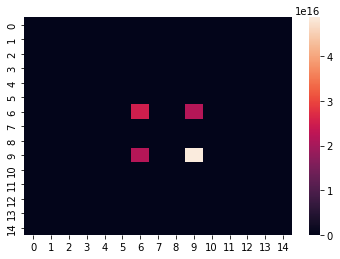

In [170]:
sns.heatmap(matrix)

In [147]:
L,V =  np.linalg.eig(matrix)

Eigenvalores

In [563]:
L

array([6.16789034e+16, 1.21513976e+16, 4.76012019e+03, 2.09431455e+03,
       5.87712789e+01, 8.92667768e+00, 7.17496590e+00, 7.74167332e-01,
       5.93960937e-01, 2.79548041e-01, 2.15469382e-01, 1.30146132e-01,
       5.77477231e-02, 7.74972366e-02, 6.88502460e-02])

Obtener el porcentaje de covarianza de cada uno de los atributos

In [564]:
total = L.sum()
p = (L/total)*100
columnas1 = df.columns.values
for index, row in enumerate(p):
  print(columnas1[index] + ':',row)

quarter: 83.54144921416204
stock: 16.45855078582856
date: 6.447380177779636e-12
open: 2.8366599140600013e-12
high: 7.960319556452181e-14
low: 1.2090804941807718e-14
close: 9.718185896009877e-15
volume: 1.0485766970233678e-15
percent_change_price: 8.044948069757405e-16
percent_change_volume_over_last_wk: 3.786359216022859e-16
previous_weeks_volume: 2.918441055101622e-16
next_weeks_open: 1.7627739573070246e-16
next_weeks_close: 7.821683277971073e-17
percent_change_next_weeks_price: 1.049667082014988e-16
days_to_next_dividend: 9.325472753436328e-17


#### A partir del análisis PCA se puede deducir que los atributos que mayor influencia tienen en la base de datos son; quarter y stock, por lo que on elegidos para trabajar la regresión polinomial

### Analizando el vector de tiempo de los datos

In [544]:
df['date']

0       1/7/2011
1      1/14/2011
2      1/21/2011
3      1/28/2011
4       2/4/2011
         ...    
745    5/27/2011
746     6/3/2011
747    6/10/2011
748    6/17/2011
749    6/24/2011
Name: date, Length: 750, dtype: object

In [113]:
#df['date'] = pd.to_datetime(df['date'])

In [551]:
df['date'].dtype

dtype('O')

### Filtrando los datos para solor trabajar con AA en el atributo stock

In [552]:
open_aa = df[df['stock']=='AA']

In [553]:
type(open_aa)

pandas.core.frame.DataFrame

In [554]:
open_aa['open']

0      15.82
1      16.71
2      16.19
3      15.87
4      16.18
5      17.33
6      17.39
7      16.98
8      16.81
9      16.58
10     15.95
11     16.38
360    17.13
361    17.42
362    18.06
363    16.36
364    16.94
365    17.27
366    17.16
367     17.0
368    15.96
369    16.73
370    15.92
371    15.29
372    14.67
Name: open, dtype: object

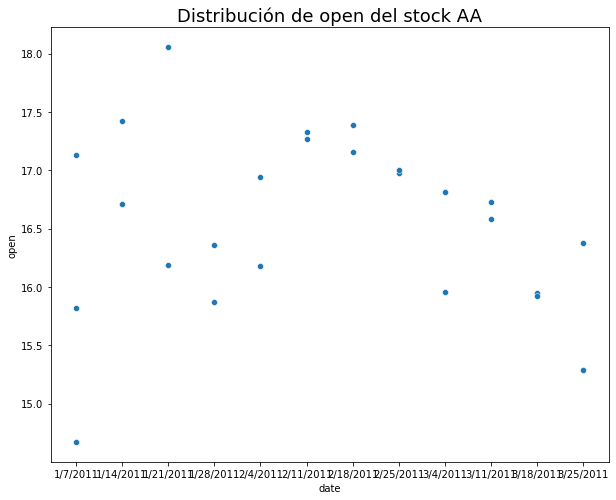

In [653]:
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x=df['date'],y=open_aa['open'], ax=ax)
plt.title('Distribución de open del stock AA', fontsize = 18)
plt.show()

In [556]:
len(open_aa['open'])

25

Codificando las observaciones del atributo open

In [309]:
df_cod =  df[df.columns].replace({'AA':0, 'AXP':1, 'WMT':2, 'VZ':3, 'UTX':4, 'TRV':5, 'T':6, 'PG':7, 'PFE':8, 
                               'MSFT':9, 'MRK':10, 'MMM':11, 'MCD':12, 'KO':13, 'KRFT':14, 'JPM':15, 'JNJ':16, 
                               'INTC':17, 'IBM':18, 'HPQ':19, 'HD':20, 'GE':21, 'DIS':22, 'DD':23, 'CVX':24, 
                               'CSCO':25, 'CAT':26, 'BAC':27, 'BA':28, 'XOM':29})

In [557]:
df_cod.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,0,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,-0.960000,4.496346e+08,16.71,15.97,-4.428490,26,0.182704
1,1,0,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,-0.676921,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,0,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-0.905318,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,0,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,-0.635900,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,0,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,-0.673798,1.513792e+08,17.33,17.37,0.230814,97,0.175029


# Regresión Polinomial

In [565]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import time

Nota el grado de la ecuacion debe ser menor al numero total de datos

##### Adecuando los datos

In [572]:
open_aa = open_aa.reset_index()
x = open_aa.index.to_numpy()

In [573]:
y=np.array(open_aa['open'], dtype=float)

In [644]:
def poly_regression(x,y,grado):
    
    n = len(x)
    nsumax=[n, sum(x)];
    d=[]
    
    for r in range(2,grado*2+1):
        s = 0
        for k in range(len(x)):
            s += m.pow(x[k],r)
        nsumax.append(s)

    for k in range(grado+1):
        s=sum(np.power(x,k)* y)
        d.append(s) 
    
    
    
    size=grado+1;
    A=np.zeros([size, size])

    for k in range(size):
        A[k,:]= nsumax[k:(k+size)]

    b= np.dot(np.linalg.inv(A),d)
    #x_aprox= np.arange(x[0],x[n-1]+0.1,0.1)
    x_aprox = x
    y_aprox=0
    y_aproxR=0

    ecuacion= str('')

    for k in range(grado+1):
        y_aprox = y_aprox + b[k]*np.power(x_aprox,k)
        y_aproxR = y_aproxR + b[k] * np.power(x,k)
        if b[k] > 0:
            ecuacion = ecuacion + ' + ' + str(round(b[k],2)) + 'x^' + str(k)#CONVIRTIENDO A STRING PARA PONER ECUACION EN LA GRAFICA
        elif b[k] < 0:
            ecuacion = ecuacion + ' - ' + str(abs(round(b[k],2))) + 'x^' + str(k)#CONVIRTIENDO A STRING PARA PONER ECUACION EN LA GRAFICA
    sr=0
    st=0
    y_mean=np.mean(y)

    for k in range(2,n):
        sr=sr+ (y[k] - y_aproxR[k] )**2;
        st=st+ (y[k] - y_mean )**2;
    r2=(st-sr)/st
    r = r2**.5
    
    return y_aprox,r,r2

### Regresión polinomial de grado 6

In [645]:
y_aprox_6, r, r2 = poly_regression(x,y,6)

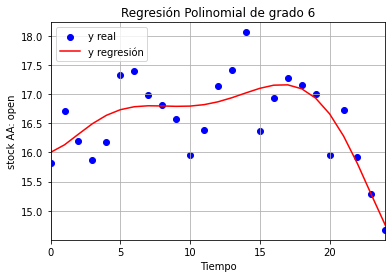

r2: 0.6198339355352188
r: 0.7872953292984907


In [643]:
fig, ax = plt.subplots()
ax.scatter(x, y,color='blue',marker ="o",label = 'y real')
ax.plot(x, y_aprox_6,color='red', label = 'y regresión')
ax.set_title('Regresión Polinomial de grado 6')
ax.set_xlabel("Tiempo")
ax.set_ylabel("stock AA: open")
ax.grid()
ax.set_xlim(x[0],x[n-1])

ax.legend(loc = 'upper left')
plt.show()
print("r2:",r2)
print("r:",r)


### Regresión polinomial de grado 8

In [646]:
y_aprox_8, r_8, r2_8 = poly_regression(x,y,8)

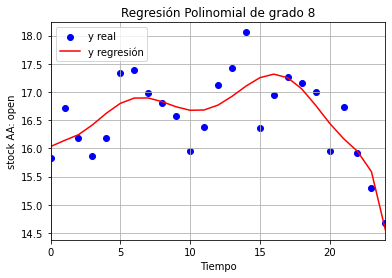

r2: 0.649747737678354
r: 0.806069313197292


In [647]:
fig, ax = plt.subplots()
ax.scatter(x, y,color='blue',marker ="o",label = 'y real')
ax.plot(x, y_aprox_8,color='red', label = 'y regresión')
ax.set_title('Regresión Polinomial de grado 8')
ax.set_xlabel("Tiempo")
ax.set_ylabel("stock AA: open")
ax.grid()
ax.set_xlim(x[0],x[n-1])

ax.legend(loc = 'upper left')
plt.show()
print("r2:",r2_8)
print("r:",r_8)


### Definiendo las m[etricas de errores para datos continuos

In [619]:
def mean_squared_error(y_true, y_pred):
    squared_error = np.square(y_true - y_pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / y_true.size
    return mse_loss

In [622]:
def mean_absolute_error(y_true, y_pred):
    abs_error = np.abs(y_true - y_pred) 
    sum_abs_error = np.sum(abs_error)
    mse_loss = sum_abs_error / y_true.size
    return mse_loss

In [626]:
def root_mean_squared_error(y_true, y_pred):
    squared_error = np.square(y_true - y_pred) 
    sum_squared_error = np.sum(squared_error)
    rmse_loss = np.sqrt(sum_squared_error / y_true.size)
    return rmse_loss

In [631]:
def relative_squared_error(y_true, y_pred):
    true_mean = np.mean(y_true)
    squared_error_num = np.sum(np.square(y_true - y_pred))
    squared_error_den = np.sum(np.square(y_true - true_mean))
    rse_loss = squared_error_num / squared_error_den
    return rse_loss

### Evaluación de la regresión de grado 6

In [650]:
print("Resultados con regresión de grado 6")
print('R2:',r2)
print('R:',r)
print('MSE:',mean_squared_error(y,y_aprox_6))
print('MAE:',mean_absolute_error(y,y_aprox_6))
print('RMSE:',root_mean_squared_error(y,y_aprox_6))
print('RSE:',relative_squared_error(y,y_aprox_6))

Resultados con regresión de grado 6
R2: 0.6198339355352188
R: 0.7872953292984907
MSE: 0.2157664508181684
MAE: 0.36800792068047067
RMSE: 0.46450667467558354
RSE: 0.39108529598444186


### Evaluación de la regresión de grado 8

In [651]:
print("Resultados con regresión de grado 8")
print('R2:',r2_8)
print('R:',r_8)
print('MSE:',mean_squared_error(y,y_aprox_8))
print('MAE:',mean_absolute_error(y,y_aprox_8))
print('RMSE:',root_mean_squared_error(y,y_aprox_8))
print('RSE:',relative_squared_error(y,y_aprox_8))

Resultados con regresión de grado 8
R2: 0.649747737678354
R: 0.806069313197292
MSE: 0.1999805219832068
MAE: 0.36277362139536273
RMSE: 0.44719181788490586
RSE: 0.36247267049331316
